<a href="https://colab.research.google.com/github/sameersahu473/rp/blob/main/ambient_window.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
from scipy.misc import face
from scipy.signal import wiener
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [97]:
dt1 = pd.read_csv("win3_col.csv")
dt2 = pd.read_csv("win3_clean.csv")

In [98]:
dt1.head()

,signal
0,4.091973
1,4.321978
2,3.298262
3,4.069679
4,3.854986


In [99]:
noise = dt1["signal"]

clean = dt2["signal"]

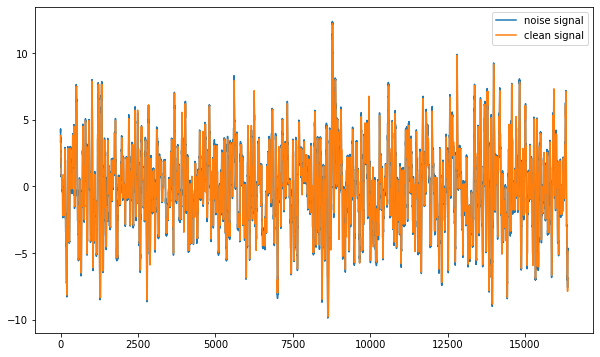

In [100]:


plt.figure(figsize=(10, 6))
plt.plot(noise, label='noise signal')
plt.plot(clean, label='clean signal')

plt.legend(loc='best')
plt.show()


In [101]:
len(noise)

16383

Using weiner filter


In [102]:
!pip install astroML
from astroML.filters import wiener_filter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://www.astroml.org/book_figures_1ed/chapter10/fig_wiener_filter.html

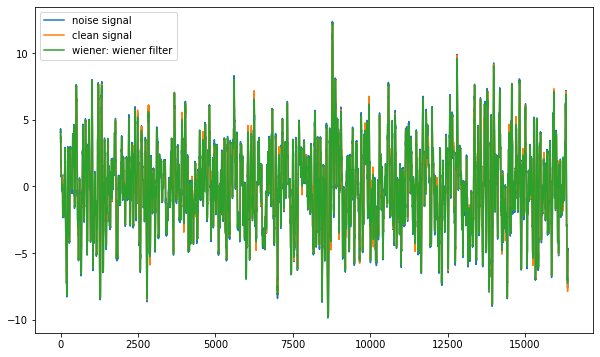

In [103]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(noise, label='noise signal')
plt.plot(clean, label='clean signal')
plt.plot(signal.wiener(noise), label='wiener: wiener filter')

plt.legend(loc='best')
plt.show()

In [104]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(clean, signal.wiener(noise)))

In [105]:

from sklearn import metrics
print(metrics.mean_squared_error(clean,signal.wiener(noise)))

0.08033610452430018


In [106]:
len(noise)

16383

In [107]:
noise_train = noise[:10000]
noise_test = noise[10000:]

clean_train = clean[:10000]
clean_test = clean[10000:]

using knn regressor

In [108]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(n_neighbors=100, weights='uniform')

In [109]:
clf.fit(noise_train.values.reshape(-1,1), clean_train)

KNeighborsRegressor(n_neighbors=100)

In [110]:
clean_pred = clf.predict(noise_test.values.reshape(-1,1))

In [111]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(clean_test, clean_pred))

In [112]:
clean_pred = clf.predict(noise.values.reshape(-1,1))

In [113]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(clean, clean_pred))


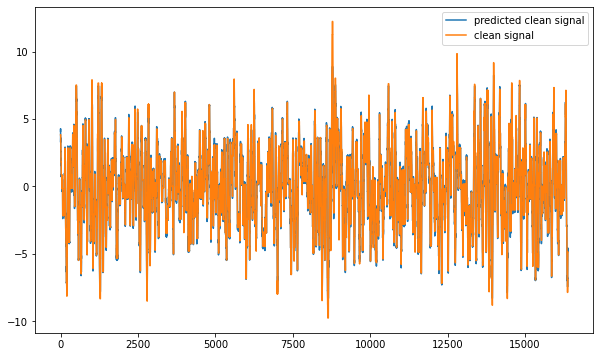

In [114]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(clean_pred, label='predicted clean signal')
plt.plot(clean, label='clean signal')


plt.legend(loc='best')
plt.show()

In [115]:
print(metrics.mean_squared_error(clean,clean_pred))

0.1202540982063057


In [116]:
import xgboost as xgb
regressor=xgb.XGBRegressor(eval_metric='rmse')

In [117]:
regressor.fit(noise_train.values.reshape(-1,1), clean_train)

[09:44:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eval_metric='rmse')

In [118]:
clean_pred = regressor.predict(noise.values.reshape(-1,1))

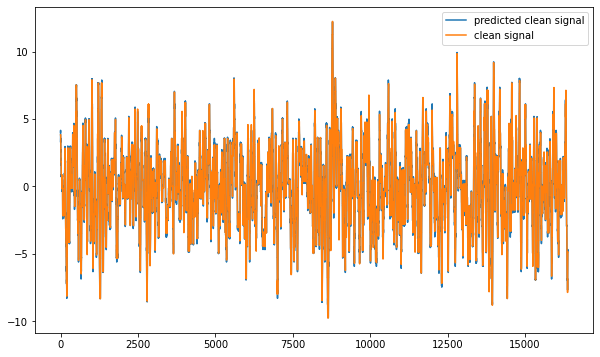

In [119]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(clean_pred, label='predicted clean signal')
plt.plot(clean, label='clean signal')


plt.legend(loc='best')
plt.show()

In [120]:

from sklearn import metrics
print(metrics.mean_squared_error(clean,clean_pred))

0.10079972084695345


In [121]:
result_df = pd.DataFrame(clean_pred, columns = ['predicted'])

In [122]:
result_df.to_csv('win3_pred.csv')